<a href="https://colab.research.google.com/github/mahidhiman12/pytorch/blob/main/4_PyTorch_NN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises

##### 1. Make a binary classification dataset with Scikit-Learn's make_moons() function. For consistency, the dataset should have 1000 samples and a random_state=42. Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
import torch
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

n_samples = 1000
X_moons , y_moons = make_moons(n_samples=n_samples ,noise = 0.05 , random_state = 42)
X_moons = torch.from_numpy(X_moons).to(device)
y_moons = torch.from_numpy(y_moons).to(device)

X_moons_train , X_moons_test , y_moons_train , y_moons_test = train_test_split(X_moons , y_moons , test_size = 0.2 )
len(X_moons_train) , len(X_moons_test) , len(y_moons_train) , len(y_moons_train)

(800, 200, 800, 800)

In [9]:
len(X_moons) , len(y_moons)

(1000, 1000)

In [10]:
X_moons_train[:5] , y_moons_train[:5]

(tensor([[-0.2123,  0.9265],
         [ 0.8455,  0.4721],
         [ 1.0408, -0.4494],
         [ 1.0468,  0.0636],
         [ 1.9069, -0.0614]], device='cuda:0', dtype=torch.float64),
 tensor([0, 0, 1, 0, 1], device='cuda:0'))

In [11]:
import pandas as pd
moons = pd.DataFrame({"X1":X_moons[:,0].cpu(),
                     "X2":X_moons[:,1].cpu(),
                     "label" :y_moons.cpu()})
moons.head()

,X1,X2,label
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


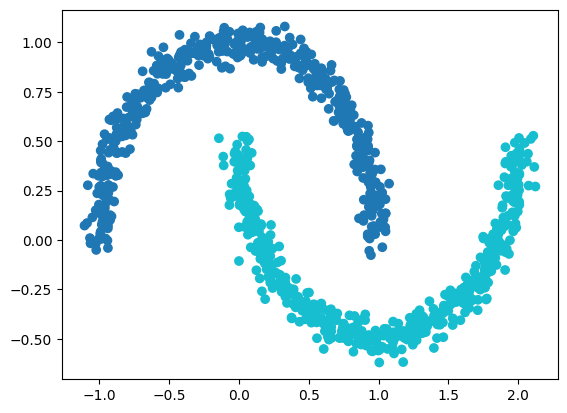

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_moons[:,0].cpu().numpy(), X_moons[:,1].cpu().numpy() , c=y_moons.cpu().numpy() , cmap=plt.cm.tab10);

##### 2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1. Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [13]:
from torch import nn
class MoonModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 , out_features=10)
    self.relu1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=10 , out_features=10)
    self.relu2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)

  def forward(self,x):
    return self.layer_3(self.relu2(self.layer_2(self.relu1(self.layer_1(x)))))

model_0 = MoonModelV0().to(device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu1): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (relu2): ReLU()
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [14]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

##### 3. Setup a binary classification compatible loss function and optimizer to use when training the model.

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters() , lr = 0.1)

##### 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
Train the model for long enough for it to reach over 96% accuracy.
The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [18]:
!pip -q install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.7 MB/s eta 0:00:00


In [20]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass" , num_classes = 2).to(device)
acc_fn

MulticlassAccuracy()

In [21]:
torch.manual_seed(42)

X_moons_train , y_moons_train = X_moons_train.to(device).float() , y_moons_train.to(device).float()
X_moons_test , y_moons_test = X_moons_test.to(device).float() , y_moons_test.to(device).float()

epochs = 1000

for epoch in range(epochs):
  # training
  model_0.train()
  y_logits = model_0(X_moons_train).squeeze(dim=1)
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits , y_moons_train)
  acc = acc_fn(y_pred , y_moons_train.int())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_moons_test).squeeze(dim=1)
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_moons_test)
    test_acc = acc_fn(test_pred , y_moons_test.int())

  if epoch % 100 == 0:
    print(f"epoch : {epoch} | train loss : {loss:.4f} , train acc : {acc:.2f} | test loss : {test_loss:.4f} , test acc : {test_acc:.2f}")

epoch : 0 | train loss : 0.6954 , train acc : 0.37 | test loss : 0.6944 , test acc : 0.49
epoch : 100 | train loss : 0.3881 , train acc : 0.81 | test loss : 0.4023 , test acc : 0.80
epoch : 200 | train loss : 0.2367 , train acc : 0.89 | test loss : 0.2394 , test acc : 0.88
epoch : 300 | train loss : 0.1921 , train acc : 0.92 | test loss : 0.1889 , test acc : 0.90
epoch : 400 | train loss : 0.1534 , train acc : 0.94 | test loss : 0.1497 , test acc : 0.94
epoch : 500 | train loss : 0.1096 , train acc : 0.95 | test loss : 0.1063 , test acc : 0.98
epoch : 600 | train loss : 0.0717 , train acc : 0.98 | test loss : 0.0694 , test acc : 0.99
epoch : 700 | train loss : 0.0469 , train acc : 0.99 | test loss : 0.0454 , test acc : 0.99
epoch : 800 | train loss : 0.0327 , train acc : 1.00 | test loss : 0.0317 , test acc : 1.00
epoch : 900 | train loss : 0.0242 , train acc : 1.00 | test loss : 0.0236 , test acc : 1.00


##### 5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [22]:


import numpy as np

def plot_decision_boundary(model, X, y):


    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")


    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))


    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()


    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)


    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))


    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.tab10, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.tab10)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


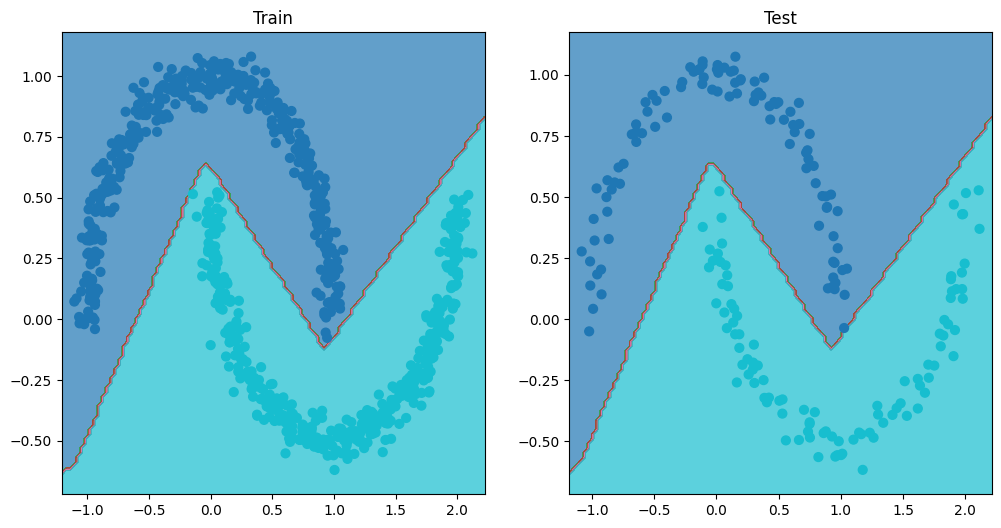

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_moons_train, y_moons_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_moons_test, y_moons_test)

##### 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
Feel free to reference the ML cheatsheet website for the formula.

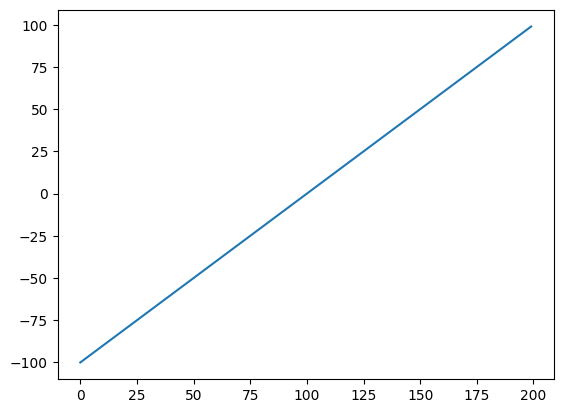

In [24]:
A = torch.arange(-100 , 100 , 1, dtype = torch.float32)
plt.plot(A);

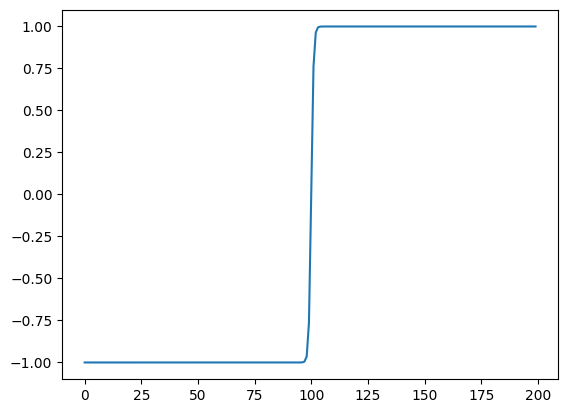

In [25]:
# built-in tanh
plt.plot(torch.tanh(A));

In [26]:
def tanh(x):
  return ((torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x)))


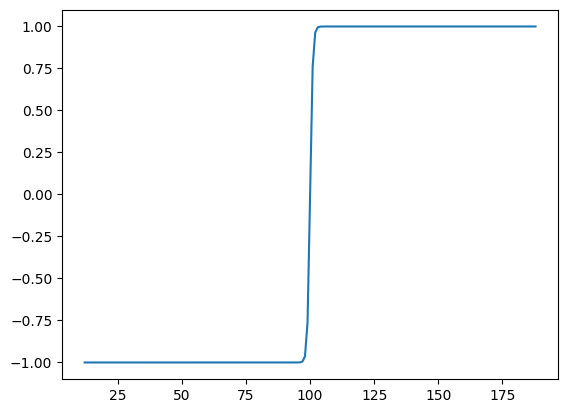

In [27]:
plt.plot(tanh(A));

##### 7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).
Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

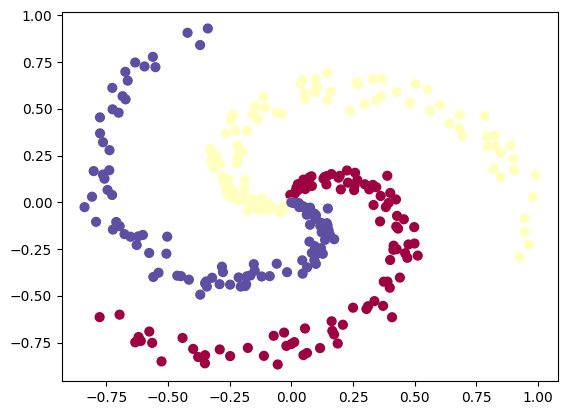

In [28]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [36]:
X[:5],y[:5]

(tensor([[ 0.0000,  0.0000],
         [ 0.0010,  0.0101],
         [ 0.0027,  0.0200],
         [ 0.0040,  0.0300],
         [-0.0041,  0.0402]]),
 tensor([0, 0, 0, 0, 0]))

In [30]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.LongTensor)

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)
len(X) , len(y) ,len(X_train) , len(X_test) , len(y_train) , len(y_test)

(300, 300, 240, 60, 240, 60)

In [34]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass" , num_classes = 3).to(device)
acc_fn

MulticlassAccuracy()

In [41]:
class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2 , out_features=10)
    self.relu1 = nn.ReLU()
    self.layer2 = nn.Linear(in_features = 10 , out_features=10)
    self.relu2 = nn.ReLU()
    self.layer3 = nn.Linear(in_features = 10 , out_features=3)

  def forward(self,x):
    return self.layer3(self.relu2(self.layer2(self.relu1(self.layer1(x)))))

model_1 = SpiralModel().to(device)
model_1


SpiralModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=10, out_features=3, bias=True)
)

In [42]:
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.1807, -0.4035],
                      [-0.2421, -0.5283],
                      [ 0.2522,  0.5473],
                      [-0.6657,  0.1642],
                      [ 0.3653,  0.1282],
                      [-0.2518,  0.3691],
                      [ 0.3716,  0.2644],
                      [-0.1243, -0.1872],
                      [ 0.0756, -0.1249],
                      [-0.2107,  0.4520]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.6077, -0.0700, -0.1583,  0.0103, -0.0422,  0.1700,  0.1982, -0.6422,
                      -0.2609,  0.5955], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.1232, -0.0157, -0.1907, -0.1935, -0.2833, -0.1031,  0.1068,  0.2016,
                        0.1460, -0.2795],
                      [-0.1902, -0.0499,  0.3059,  0.0457, -0.0819,  0.1308, -0.1204, -0.2047,
                        0.2308, -0.1438],
                      [-0.0634, -0.3146, 

In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters() , lr = 0.01)
loss_fn , optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0
 ))

In [51]:
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze(dim=1)
  y_preds = torch.softmax(y_logits , dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits , y_train)
  acc = acc_fn(y_preds , y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze(dim=1)
    test_preds = torch.softmax(test_logits , dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits , y_test)
    test_acc = acc_fn(test_preds , y_test)


  if epoch % 10 == 0:
    print(f"epoch : {epoch} | train loss : {loss:.4f} , train acc : {acc:.2f} | test loss : {test_loss} , test acc : {test_acc:.2f}")


epoch : 0 | train loss : 0.0533 , train acc : 0.99 | test loss : 0.09646103531122208 , test acc : 0.98
epoch : 10 | train loss : 0.0507 , train acc : 0.99 | test loss : 0.10161460936069489 , test acc : 0.98
epoch : 20 | train loss : 0.0483 , train acc : 0.99 | test loss : 0.09926252067089081 , test acc : 0.98
epoch : 30 | train loss : 0.0461 , train acc : 0.99 | test loss : 0.09439553320407867 , test acc : 0.98
epoch : 40 | train loss : 0.0439 , train acc : 0.99 | test loss : 0.08720993995666504 , test acc : 0.98
epoch : 50 | train loss : 0.0416 , train acc : 0.99 | test loss : 0.08765267580747604 , test acc : 0.98
epoch : 60 | train loss : 0.0397 , train acc : 0.99 | test loss : 0.09740832448005676 , test acc : 0.98
epoch : 70 | train loss : 0.0381 , train acc : 0.99 | test loss : 0.10438596457242966 , test acc : 0.98
epoch : 80 | train loss : 0.0367 , train acc : 0.99 | test loss : 0.10502168536186218 , test acc : 0.98
epoch : 90 | train loss : 0.0355 , train acc : 0.99 | test loss :

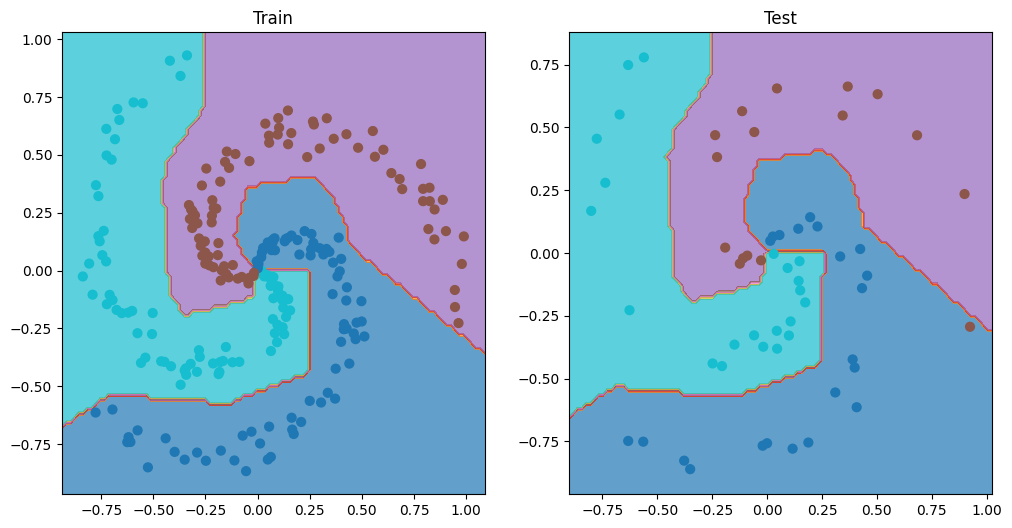

In [52]:
# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)